In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

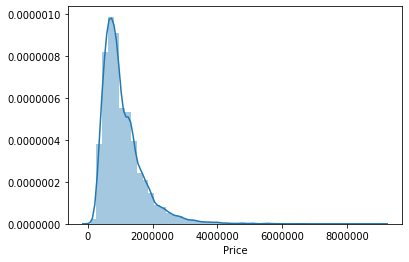

In [5]:
#checking the distibution of the price of the houses using scatter plot
sns.distplot(df['Price'])


The price distibution is normally distibuted 

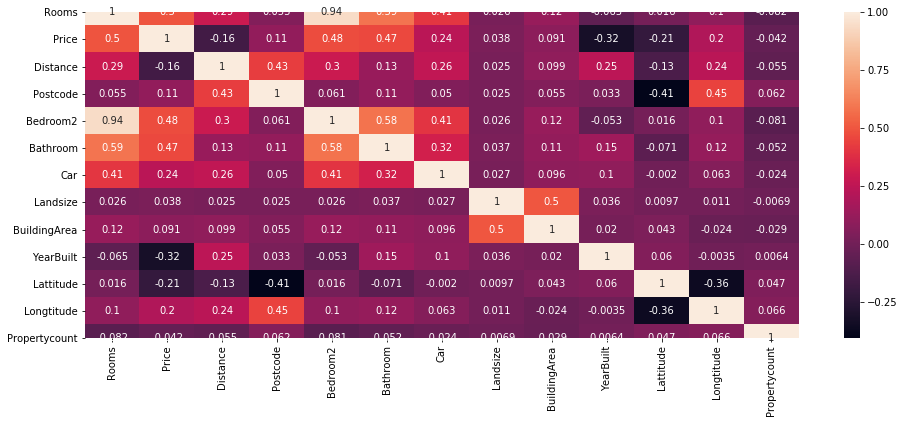

In [11]:
#correlation analysis of the whole data
# sns.heatmap(df)
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

In [18]:
#finding the indendent varaibles which are related to our  target variable which is price
p_corr=df.corr()
p_corr['Price'].sort_values(ascending=False)


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

It show the price of house is highly influenced by number of rooms  and least influenced by the year the property was built

In [26]:
#checking for the missing values in the data set
missing = df.isnull().sum()
missing.sort_values(ascending=False)



BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

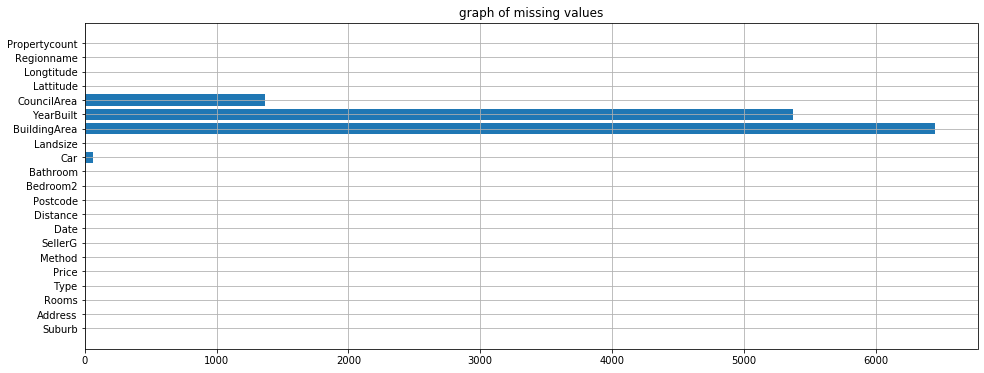

In [34]:
#Visualize the missing data to  actually seen how much data was missing
plt.figure(figsize=(16,6))
plt.barh(df.columns,missing)
plt.title("graph of missing values")
plt.grid()

In [37]:
#calculating the percantage sof the missing data to determine which method to use for handling the missing data
percent_missing =df.isnull().mean()*100
percent_missing.sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Propertycount     0.000000
Date              0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Bedroom2          0.000000
Distance          0.000000
Postcode          0.000000
Regionname        0.000000
Bathroom          0.000000
Landsize          0.000000
Lattitude         0.000000
Longtitude        0.000000
Suburb            0.000000
dtype: float64

So many data missing in the BuildingArea   and YearBuilt  but we cannot drop those 2 varaible becuase they usually pla a vital role in the real estate market

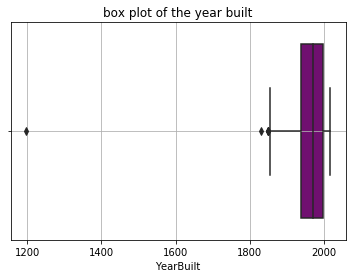

In [48]:
# dealing with the year built data
#drawing the bocplot of the data 
sns.boxplot(df['YearBuilt'],data=df,color='purple')
plt.title("box plot of the year built")
plt.grid()

It show their is the outlier in the data  which is around 1200

/home/karimi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/karimi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


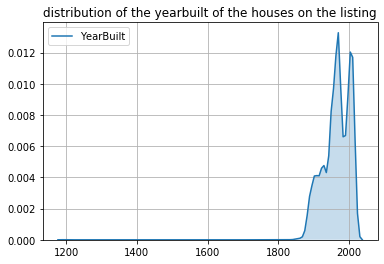

In [49]:
#drawing the kde of the data rather than the fancy word kde it mean the smoothed histogram of the data
sns.kdeplot(df['YearBuilt'],shade=True)
plt.title('distribution of the yearbuilt of the houses on the listing')
plt.grid()

It show our building in the real estate listing were built from the year 1820 to 2000

In [50]:
#understanding the year bulit data
df['YearBuilt'].describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

It show the latest house was built in 2018,oldest 1196

In [54]:
#filling the msiisng data
df['YearBuilt'].replace({np.nan:df['YearBuilt'].median()},inplace=True)

Text(0.5, 1.0, 'Boxplot of BuildingArea of the houses')

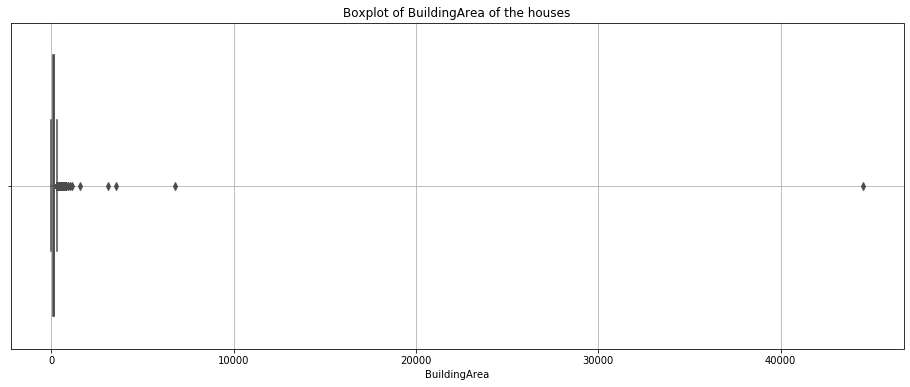

In [59]:
#dealing with BuildingArea data
#1 visualize using the boxplot to check for otliers
plt.figure(figsize=(16,6))
sns.boxplot(df[ 'BuildingArea'],data=df,color='red')
plt.grid()
plt.title('Boxplot of BuildingArea of the houses')

Shows most the bulding lies between 0 to 10000 area  and it also show the outlier over 40000

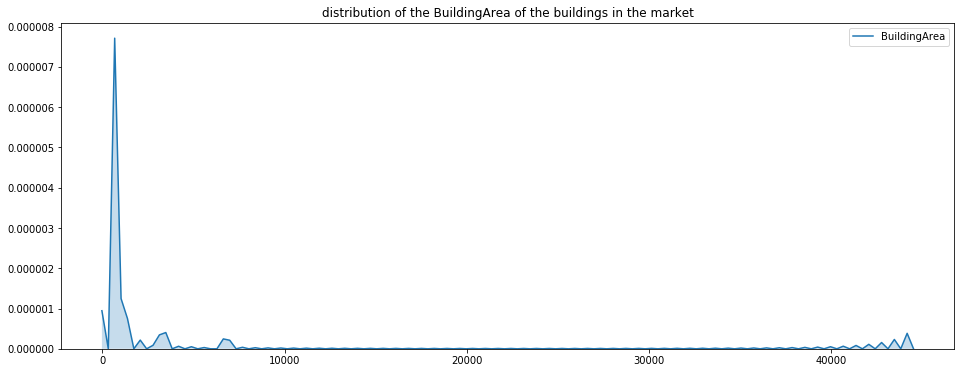

In [61]:
#drwaing the kde
plt.figure(figsize=(16,6))
plt.title("distribution of the BuildingArea of the buildings in the market")
sns.kdeplot(df['BuildingArea'],shade=True)

In [62]:
#understand the data
df['BuildingArea'].describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [63]:
df['BuildingArea'].replace({np.nan:df['BuildingArea'].mode()},inplace=True)

Text(0.5, 1.0, 'distibution of thenumber of cars that can fit into  the house on the listing')

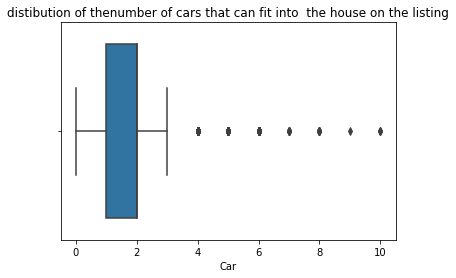

In [65]:
#dealing with car
#drawing aboxplot
sns.boxplot(df['Car'])
plt.title( "distibution of thenumber of cars that can fit into  the house on the listing")

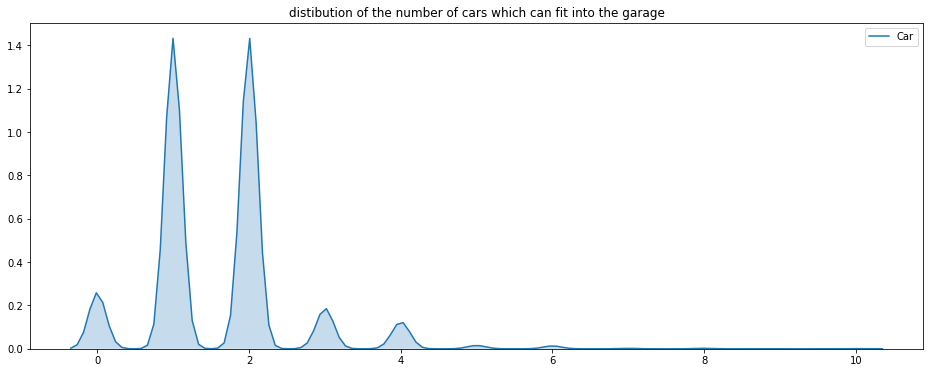

In [70]:
plt.figure(figsize=(16,6))
plt.title("distibution of the number of cars which can fit into the garage")
sns.kdeplot(df['Car'],shade=True,)

In [71]:
#understanding the data
df['Car'].describe()

count    13518.000000
mean         1.610075
std          0.962634
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Car, dtype: float64

It shows the data has some outliers which is 10 and most of the houses have  mostly 2 car space 
IT also show the number of cars are not continues  so the best method to deal with null data is to
replace it with 0

In [73]:
df['Car'].fillna(0,inplace=True)

In [77]:
#dealing with CouncilArea  
df['CouncilArea'].head()

0    Yarra
1    Yarra
2    Yarra
3    Yarra
4    Yarra
Name: CouncilArea, dtype: object

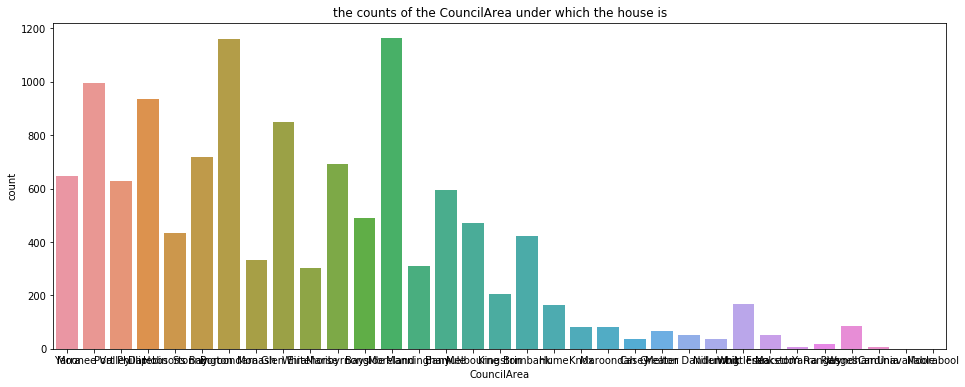

In [81]:
plt.figure(figsize=(16,6))
plt.title('the counts of the CouncilArea under which the house is')

sns.countplot(df['CouncilArea'])

In [82]:
df['CouncilArea'].replace({np.nan:'Unavailable'},inplace=True)

# data analysis

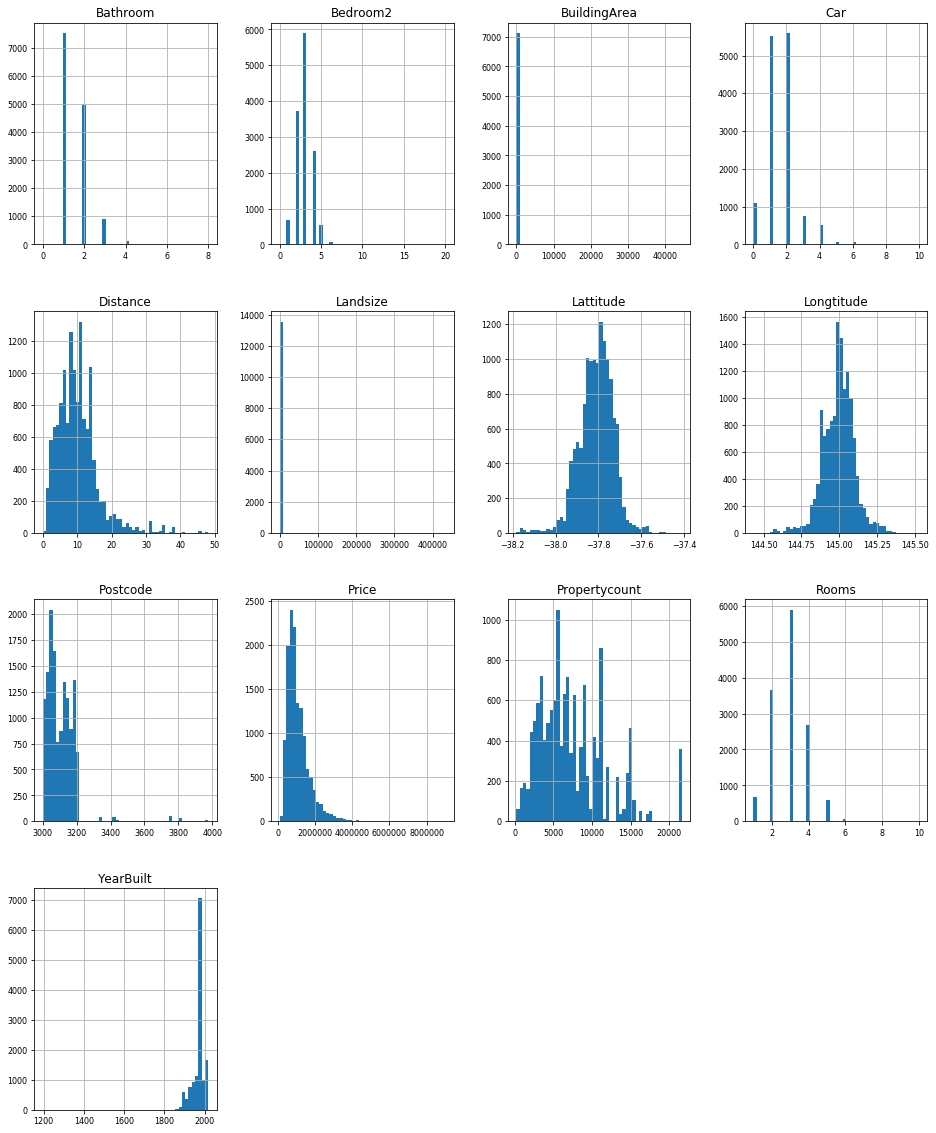

In [90]:
#dsitbution of the entire data
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

it is clear that rooms,bathrooms,bedrooms cara  buldingarea and landslide are not continous hence they are discrete and because of that we  convert them into categorical data

In [98]:
# converts=['Rooms','Car','Bedroom2 ','Bathroom']
# for i in converts:
#     df[i]=df[i].astype(object)
convert=['Car','Bedroom2','Bathroom','Rooms']
for i in convert:
    df[i]=df[i].astype(object)

In [100]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [103]:
categoric=df.select_dtypes(include='object')
numeric=df.select_dtypes(exclude=['object'])

In [104]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 9 columns):
Price            13580 non-null float64
Distance         13580 non-null float64
Postcode         13580 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        13580 non-null float64
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Propertycount    13580 non-null float64
dtypes: float64(9)
memory usage: 955.0 KB


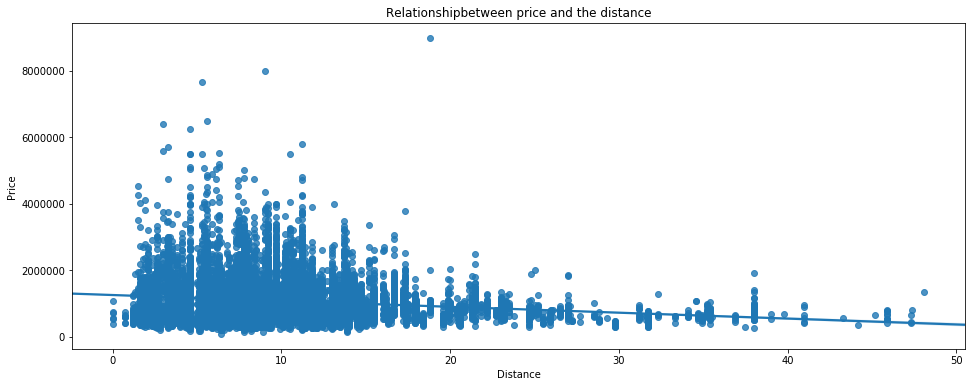

In [109]:
plt.figure(figsize=(16,6))

plt.title('Relationshipbetween price and the distance')
sns.regplot(df['Distance'],df['Price'])

It is seen that the price  is small if the  house  have a long distance from the CBD

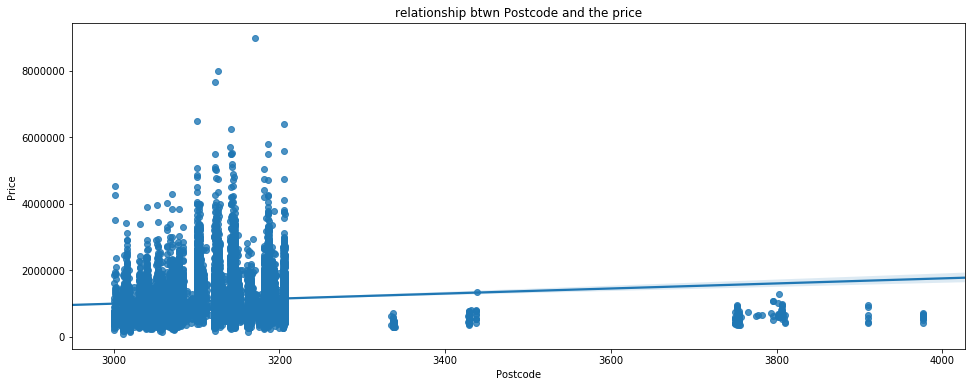

In [111]:
plt.figure(figsize=(16,6))
plt.title("relationship btwn Postcode and the price")
sns.regplot(df['Postcode'],df['Price'])

The price of the houses is high  in the Postcode between 3000 and 3200 

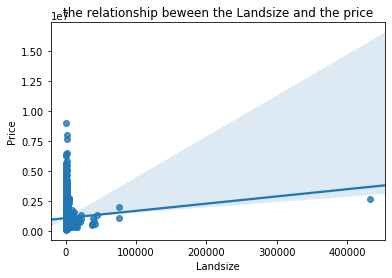

In [113]:
plt.title("the relationship beween the Landsize and the price")
sns.regplot(df['Landsize'],df['Price'])

It show their is no relationshop between the Landsize and the price

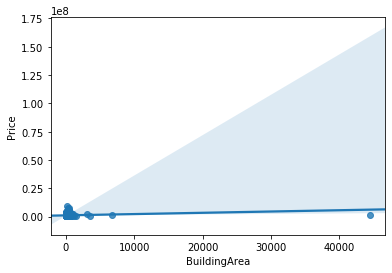

In [117]:
sns.regplot(df['BuildingArea'],df['Price'])

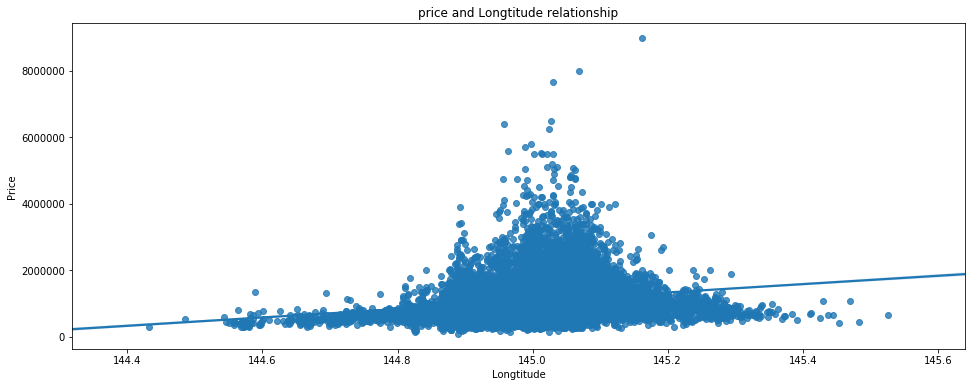

In [121]:
plt.figure(figsize=(16,6))
plt.title('price and Longtitude relationship')
sns.regplot(df['Longtitude'],df['Price'])

Most of the high price bulding are in bteen the range of 145.0 to 145.2 longitude

In [127]:

df['Date']=pd.to_datetime(df['Date'])
#extracting years from the date.
df['year'] = pd.DatetimeIndex(df['Date']).year
df['year']

0        2016
1        2016
2        2017
3        2017
4        2016
         ... 
13575    2017
13576    2017
13577    2017
13578    2017
13579    2017
Name: year, Length: 13580, dtype: int64

<Figure size 1152x432 with 0 Axes>

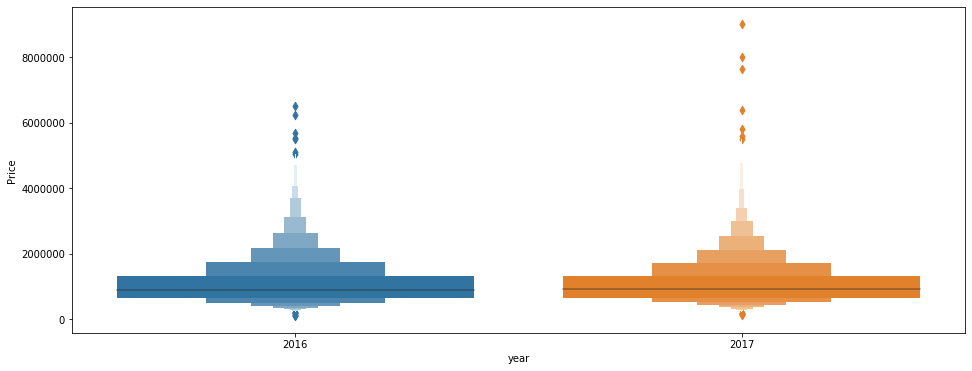

In [130]:
plt.figure(figsize=(16,6))
sns.boxenplot(df['year'],df['Price'],data=df)

They are no much diffrence between  in prices in the 2 years

In [131]:
df['Type'].head()

0    h
1    h
2    h
3    h
4    h
Name: Type, dtype: object

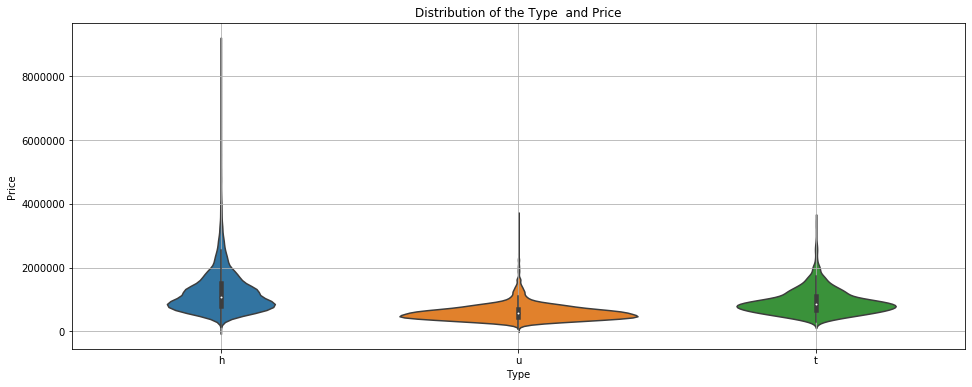

In [138]:
plt.figure(figsize=(16,6))
plt.title("Distribution of the Type  and Price")
sns.violinplot(df['Type'],df['Price'],data=df)
plt.grid()

The price is highest for h  followe by t then u

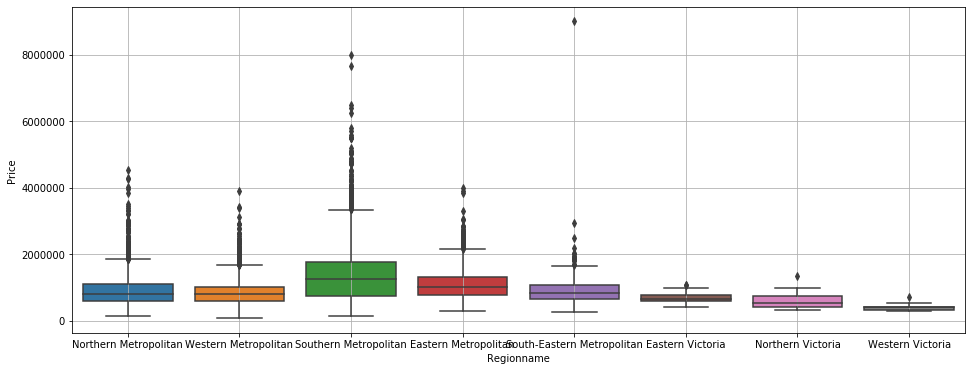

In [144]:
plt.figure(figsize=(16,6))
sns.boxplot(df['Regionname'],df['Price'],data=df)
plt.grid()

Southern Metroplitan  has the highest price tag while western victoria  has the lowest price tag

In [141]:
df['Method'].head()

0     S
1     S
2    SP
3    PI
4    VB
Name: Method, dtype: object

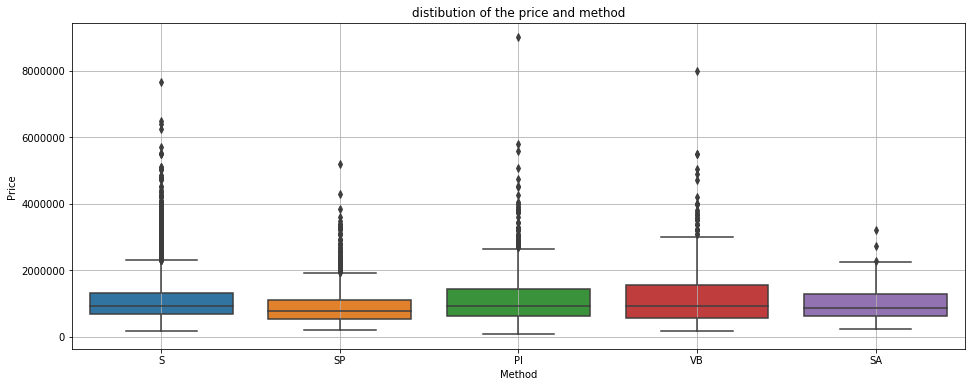

In [145]:
plt.figure(figsize=(16,6))
plt.title("distibution of the price and method")
sns.boxplot(df['Method'],df['Price'])
plt.grid()

vb had the highest price while sp has the lowest price

In [146]:
df['CouncilArea'].head()

0    Yarra
1    Yarra
2    Yarra
3    Yarra
4    Yarra
Name: CouncilArea, dtype: object

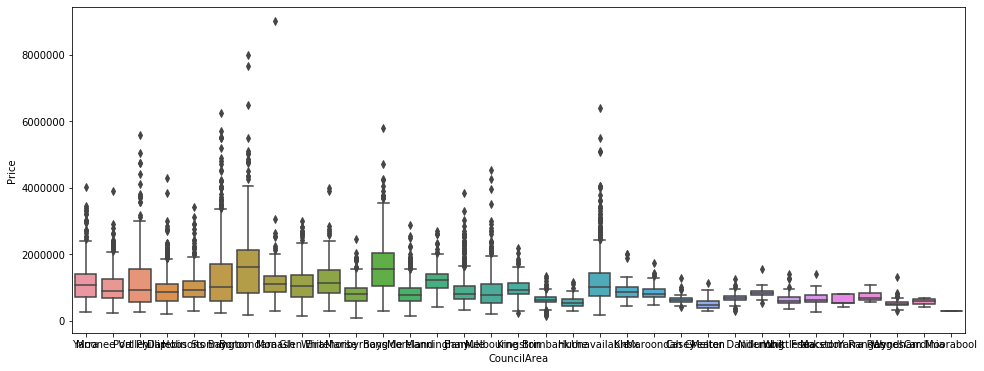

In [150]:
plt.figure(figsize=(16,6))
sns.boxplot(df['CouncilArea'],df['Price'])

Conclusion

The price of the house is inversely related to the distance from the CBD.
The price is higher for the houses in the postcode area 3000-3200.
The price is more for the type h houses with landarea, i.e villa, cottage and semi-terrace type houses.
The price of the house is more when the building area is more (linear-relationship).
The price increases with the increase in number of rooms, bedrooms and bathrooms.
The price is more for the h type,i. e - house,cottage,villa, followed by type t and type u
The houses in the southern Metropolitan region has higher price compaired to other regions, while the houses in Western victoria region has comparatively lower price.
The price is less for the properties which are sold prior(SP).
Kooyong and Bacchus Marsh are the suburbs with the most expensive houses and the cheapest houses respectively.
Weast is the most expensive seller while hockingstuart and Advantage are the cheaper sellers